In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


titanic = sns.load_dataset('titanic')


print("Dataset Info:")
print(titanic.info())
print("\nMissing Values:")
print(titanic.isnull().sum())
print("\nFirst 5 rows:")
print(titanic.head())
print("\nColumn Names:")
print(titanic.columns)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

Missing Values:
survived         0
pclass           0
sex  

In [4]:
titanic['age'] = titanic.groupby(['pclass', 'sex'])['age'].transform(lambda x: x.fillna(x.median()))

# Impute embarked with mode
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])

# Drop cabin column
titanic = titanic.drop(columns=['deck'])  # Note: Seaborn uses 'deck' instead of 'Cabin'

# Convert sex and embarked to category
titanic['sex'] = titanic['sex'].astype('category')
titanic['embarked'] = titanic['embarked'].astype('category')

# Verify missing values
print("Missing Values After Cleaning:")
print(titanic.isnull().sum())

Missing Values After Cleaning:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


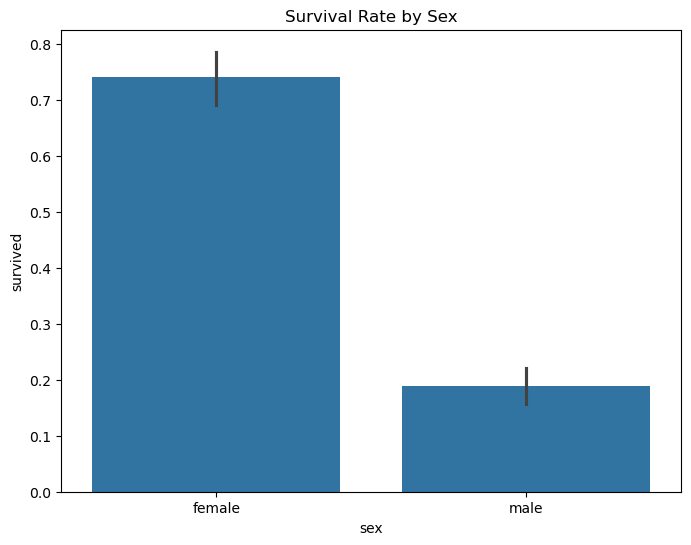

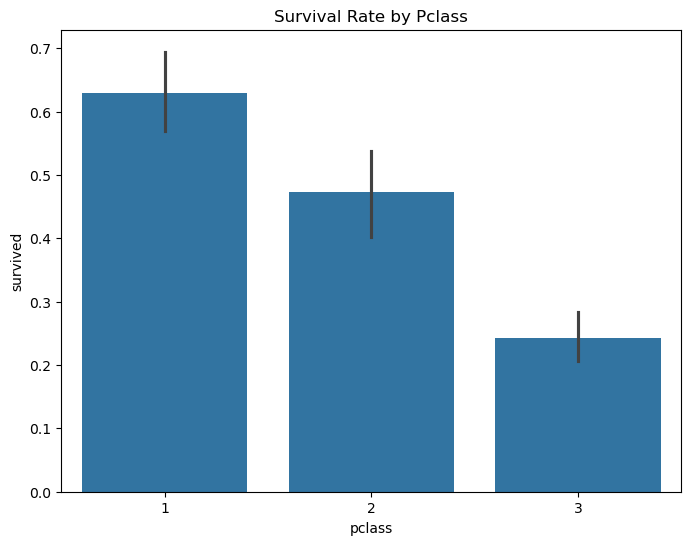

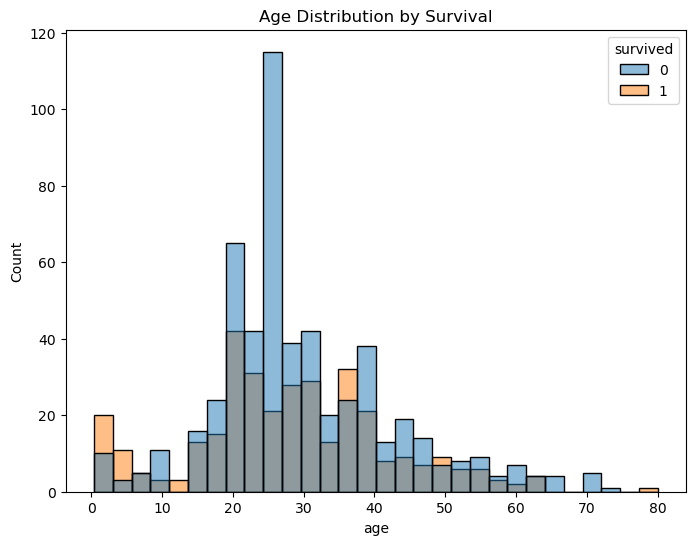

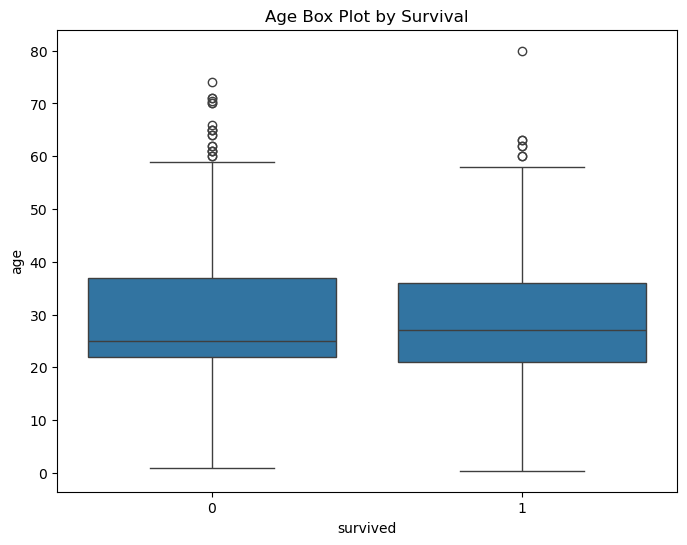

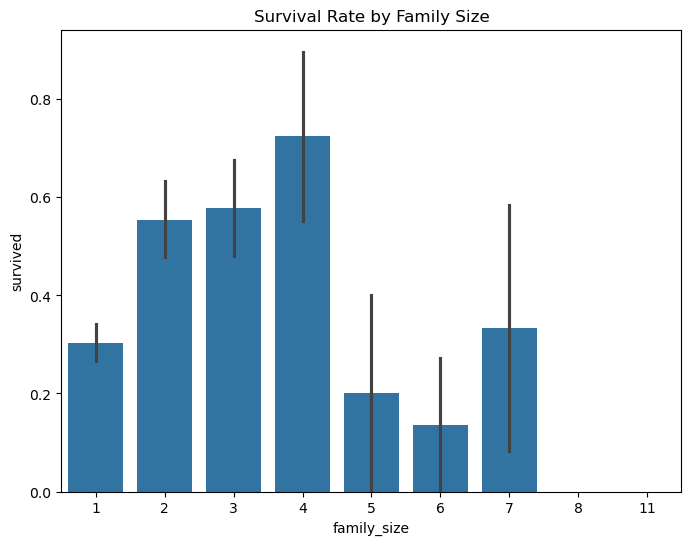

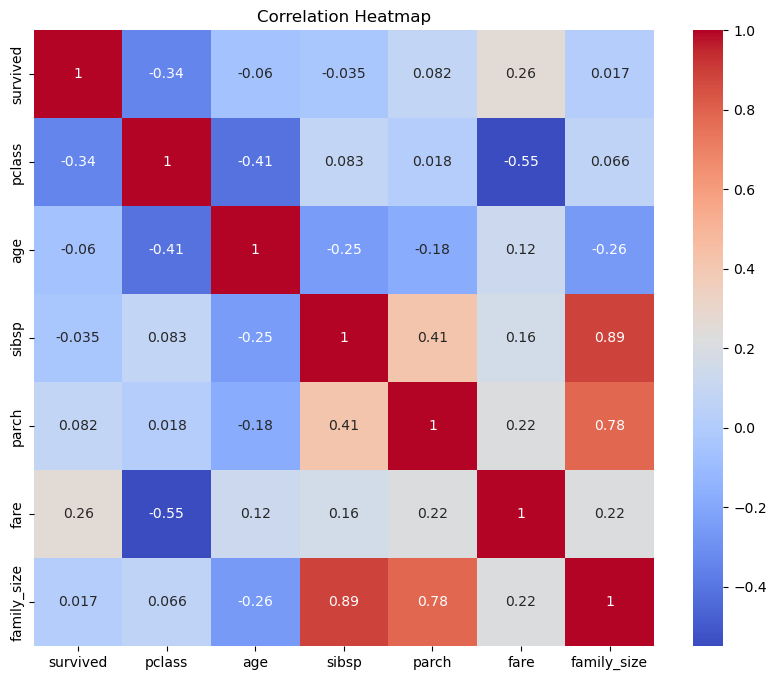

In [5]:
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='survived', data=titanic)
plt.title('Survival Rate by Sex')
plt.show()

# Survival rate by pclass
plt.figure(figsize=(8, 6))
sns.barplot(x='pclass', y='survived', data=titanic)
plt.title('Survival Rate by Pclass')
plt.show()

# Age distribution by survival
plt.figure(figsize=(8, 6))
sns.histplot(data=titanic, x='age', hue='survived', bins=30)
plt.title('Age Distribution by Survival')
plt.show()

# Box plot of age by survival
plt.figure(figsize=(8, 6))
sns.boxplot(x='survived', y='age', data=titanic)
plt.title('Age Box Plot by Survival')
plt.show()


titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1


plt.figure(figsize=(8, 6))
sns.barplot(x='family_size', y='survived', data=titanic)
plt.title('Survival Rate by Family Size')
plt.show()


plt.figure(figsize=(10, 8))
sns.heatmap(titanic.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
titanic['who'] = titanic['who'].astype('category')


print("Unique Who Values:")
print(titanic['who'].value_counts())


print("\nWho Values (No Simplification Needed):")
print(titanic['who'].value_counts())

Unique Who Values:
who
man      537
woman    271
child     83
Name: count, dtype: int64

Who Values (No Simplification Needed):
who
man      537
woman    271
child     83
Name: count, dtype: int64


In [10]:
features = ['pclass', 'sex', 'age', 'fare', 'embarked', 'family_size', 'who']
X = titanic[features]
y = titanic['survived']


X = pd.get_dummies(X, columns=['sex', 'embarked', 'who'], drop_first=True)


scaler = StandardScaler()
X[['age', 'fare', 'family_size']] = scaler.fit_transform(X[['age', 'fare', 'family_size']])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Training Feature Matrix (first 5 rows):")
print(X_train.head())

print("\nTraining Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)

Training Feature Matrix (first 5 rows):
     pclass       age      fare  family_size  sex_male  embarked_Q  \
331       1  1.232431 -0.074583    -0.560975      True       False   
733       2 -0.459686 -0.386671    -0.560975      True       False   
382       3  0.217161 -0.488854    -0.560975      True       False   
704       3 -0.234070 -0.490280     0.059160      True       False   
813       3 -1.738174 -0.018709     3.159833     False       False   

     embarked_S  who_man  who_woman  
331        True     True      False  
733        True     True      False  
382        True     True      False  
704        True     True      False  
813        True    False      False  

Training Set Shape: (712, 9)
Test Set Shape: (179, 9)
